## Importing libraries

In [1]:
# Importing frequently used libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import tensorflow as tf  # For machine learning and neural networks
import pickle  # For serializing and de-serializing Python object structures
from tensorflow import keras  # For neural networks
from tensorflow.keras.models import Sequential, Model, load_model  # For sequential and functional API models
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, InputLayer  # For different types of layers in a neural network
from tensorflow.keras.optimizers import Adam  # For the Adam optimizer
from tensorflow.keras.metrics import categorical_crossentropy, MeanSquaredError  # For different types of loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time data augmentation
from tensorflow.keras.utils import to_categorical  # For one-hot encoding
from tensorflow.keras.datasets import cifar100  # CIFAR-100 dataset
from sklearn.metrics import confusion_matrix  # For creating a confusion matrix
from sklearn.model_selection import train_test_split  # For splitting the data into train and test sets
from sklearn.model_selection import KFold  # For K-Fold cross validation
import itertools  # For creating iterators for efficient looping
import os  # For interacting with the OS
import shutil  # For high-level file operations
import torch  # PyTorch library for machine learning
import random  # For generating random numbers
import glob  # For finding all the pathnames matching a specified pattern
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python
import warnings  # For warning control
import tensorflow.keras.applications.efficientnet as efn  # For EfficientNet model
warnings.simplefilter(action='ignore', category=FutureWarning)  # Ignore future warnings
%matplotlib inline  # For inline backend

UsageError: unrecognized arguments: # For inline backend


## Importing data

In [2]:
# Define a function to load the dataset
def load_dataset(file_path):
    """
    This function loads a dataset from a given file path.
    
    Parameters:
    file_path (str): The path of the file to load.

    Returns:
    DataFrame: A pandas DataFrame containing the loaded data.
    """
    return pd.read_csv(file_path)

# Define the file paths
fake_news_file_path = r'C:\Users\RezaHardMan\Documents\Python projects\datasets\news detection\fake.csv'
real_news_file_path = r'C:\Users\RezaHardMan\Documents\Python projects\datasets\news detection\True.csv'

# Load the datasets
fake_df = load_dataset(fake_news_file_path)
real_df = load_dataset(real_news_file_path)

## Preprocess

In [3]:
# Define a function to drop unnecessary columns
def drop_columns(df, columns):
    """
    This function drops specified columns from a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame from which to drop the columns.
    columns (list): The list of column names to drop.

    Returns:
    DataFrame: The DataFrame after dropping the specified columns.
    """
    df.drop(columns, axis=1, inplace=True)
    return df

# Define the columns to drop
columns_to_drop = ['date', 'subject']

# Drop the unnecessary columns from the fake news DataFrame
fake_df = drop_columns(fake_df, columns_to_drop)

# Drop the unnecessary columns from the real news DataFrame
real_df = drop_columns(real_df, columns_to_drop)

In [4]:
# Define a function to display the first few rows of a DataFrame
def display_head(df, num_rows=5):
    """
    This function displays the first few rows of a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame to display.
    num_rows (int): The number of rows to display. Default is 5.

    Returns:
    DataFrame: The first few rows of the DataFrame.
    """
    return df.head(num_rows)

# Display the first few rows of the fake news DataFrame
display_head(fake_df)

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [5]:
# Define a function to add a class label to a DataFrame
def add_class_label(df, label):
    """
    This function adds a class label to a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame to which to add the class label.
    label (int): The class label to add.

    Returns:
    DataFrame: The DataFrame after adding the class label.
    """
    df['class'] = label
    return df

# Add a class label to the fake news DataFrame
fake_df = add_class_label(fake_df, 0)

# Add a class label to the real news DataFrame
real_df = add_class_label(real_df, 1)

In [6]:
# Define a function to concatenate two DataFrames
def concatenate_dfs(df1, df2, ignore_index=True, sort=False):
    """
    This function concatenates two DataFrames.
    
    Parameters:
    df1, df2 (DataFrame): The DataFrames to concatenate.
    ignore_index (bool): If True, the resulting axis will be labeled 0, 1, …, n - 1. Default is True.
    sort (bool): Sort non-concatenation axis if it is not already aligned when join is 'outer'. Default is False.

    Returns:
    DataFrame: The concatenated DataFrame.
    """
    return pd.concat([df1, df2], ignore_index=ignore_index, sort=sort)

# Concatenate the fake news and real news DataFrames
news_df = concatenate_dfs(fake_df, real_df)

# Display the concatenated DataFrame
news_df


,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [7]:
# Define a function to combine two columns of a DataFrame
def combine_columns(df, col1, col2, new_col):
    """
    This function combines two columns of a DataFrame into a new column.
    
    Parameters:
    df (DataFrame): The DataFrame in which to combine the columns.
    col1, col2 (str): The names of the columns to combine.
    new_col (str): The name of the new column.

    Returns:
    DataFrame: The DataFrame after combining the columns.
    """
    df[new_col] = df[col1] + df[col2]
    return df

# Combine the 'title' and 'text' columns of the news DataFrame into a new 'text' column
news_df = combine_columns(news_df, 'title', 'text', 'text')

# Define a function to drop a column from a DataFrame
def drop_column(df, column):
    """
    This function drops a column from a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame from which to drop the column.
    column (str): The name of the column to drop.

    Returns:
    DataFrame: The DataFrame after dropping the column.
    """
    df.drop(column, axis=1, inplace=True)
    return df

# Drop the 'title' column from the news DataFrame
news_df = drop_column(news_df, 'title')

In [8]:
# Define a function to split the dataset into training and testing sets
def split_dataset(inputs, targets, test_size=0.20, random_state=18):
    """
    This function splits the dataset into training and testing sets.
    
    Parameters:
    inputs (Series): The input data.
    targets (Series): The target data.
    test_size (float): The proportion of the dataset to include in the test split. Default is 0.20.
    random_state (int): The seed used by the random number generator. Default is 18.

    Returns:
    tuple: The training and testing sets.
    """
    return train_test_split(inputs, targets, test_size=test_size, random_state=random_state)

# Define the inputs and targets
inputs = news_df['text']
targets = news_df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = split_dataset(inputs, targets)

In [9]:
# Importing the required library
import re

# Define a function to normalize the data
def normalize(data):
    """
    This function normalizes the data by converting it to lowercase, removing URLs, non-word characters, 
    extra spaces, and leading/trailing spaces.
    
    Parameters:
    data (list): The data to normalize.

    Returns:
    list: The normalized data.
    """
    normalized = []
    for i in data:
        i = i.lower()  # Convert to lowercase
        i = re.sub('https?://\S+|www\.\S+', '', i)  # Remove URLs
        i = re.sub('\\W', ' ', i)  # Remove non-word characters
        i = re.sub('\n', '', i)  # Remove newline characters
        i = re.sub(' +', ' ', i)  # Remove extra spaces
        i = re.sub('^ ', '', i)  # Remove leading spaces
        i = re.sub(' $', '', i)  # Remove trailing spaces
        normalized.append(i)
    return normalized

# Normalize the training and testing sets
X_train = normalize(X_train)
X_test = normalize(X_test)


In [10]:
# Importing the required library
from keras.preprocessing.text import Tokenizer

# Define a function to tokenize the data
def tokenize_data(data, max_vocab=10000):
    """
    This function tokenizes the data using a specified maximum vocabulary size.
    
    Parameters:
    data (list): The data to tokenize.
    max_vocab (int): The maximum vocabulary size. Default is 10000.

    Returns:
    Tokenizer: The fitted tokenizer.
    """
    tokenizer = Tokenizer(num_words=max_vocab)  # Initialize the tokenizer with the maximum vocabulary size
    tokenizer.fit_on_texts(data)  # Fit the tokenizer on the data
    return tokenizer

# Define the maximum vocabulary size
max_vocab = 10000

# Tokenize the training set
tokenizer = tokenize_data(X_train, max_vocab)


In [11]:
# Define a function to convert texts to sequences
def texts_to_sequences(tokenizer, texts):
    """
    This function converts texts to sequences using a fitted tokenizer.
    
    Parameters:
    tokenizer (Tokenizer): The fitted tokenizer.
    texts (list): The texts to convert.

    Returns:
    list: The converted sequences.
    """
    return tokenizer.texts_to_sequences(texts)

# Convert the training and testing sets to sequences
X_train = texts_to_sequences(tokenizer, X_train)
X_test = texts_to_sequences(tokenizer, X_test)


In [13]:
# Importing the required libraries
import tensorflow as tf

# Define a function to pad sequences
def pad_sequences(sequences, padding='post', maxlen=256):
    """
    This function pads sequences to the same length.
    
    Parameters:
    sequences (list): The sequences to pad.
    padding (str): The type of padding. 'pre' or 'post'. Default is 'post'.
    maxlen (int): The maximum length for all sequences. Default is 256.

    Returns:
    numpy.array: The padded sequences.
    """
    return tf.keras.preprocessing.sequence.pad_sequences(sequences, padding=padding, maxlen=maxlen)

# Pad the training and testing sequences
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

# Define a function to convert labels to one hot encoding
def to_one_hot(labels, num_classes):
    """
    This function converts labels to one hot encoding.
    
    Parameters:
    labels (list): The labels to convert.
    num_classes (int): The total number of classes.

    Returns:
    numpy.array: The one hot encoded labels.
    """
    return to_categorical(labels, num_classes)

# Convert the training and testing labels to one hot encoding
y_train = to_one_hot(y_train, 2)
y_test = to_one_hot(y_test, 2)

## Training data

In [14]:
# Define a function to create the model
def create_model(max_vocab=10000):
    """
    This function creates a Sequential model with an Embedding layer, two Bidirectional LSTM layers, 
    a Dense layer, a Dropout layer, and a final Dense layer.
    
    Parameters:
    max_vocab (int): The maximum vocabulary size. Default is 10000.

    Returns:
    Sequential: The created model.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_vocab, 32),  # Embedding layer for word embeddings
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),  # First Bidirectional LSTM layer
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),  # Second Bidirectional LSTM layer
        tf.keras.layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
        tf.keras.layers.Dropout(0.5),  # Dropout layer for regularization
        tf.keras.layers.Dense(units=2, activation='softmax')  # Final Dense layer with softmax activation for classification
    ])
    return model

# Create the model
model = create_model(max_vocab)


In [16]:
# Importing the required libraries
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau

# Print the summary of the model
print(model.summary())

# Define a function to create a ModelCheckpoint callback
def create_checkpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'):
    """
    This function creates a ModelCheckpoint callback.
    
    Parameters:
    filepath (str): The path to save the model.
    monitor (str): The metric to monitor. Default is 'val_accuracy'.
    verbose (int): Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. Default is 1.
    save_best_only (bool): If True, the latest best model according to the quantity monitored will not be overwritten. Default is True.
    mode (str): One of {'auto', 'min', 'max'}. If 'save_best_only=True', the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity. For 'val_acc', this should be 'max', for 'val_loss' this should be 'min', etc. In 'auto' mode, the direction is automatically inferred from the name of the monitored quantity. Default is 'max'.

    Returns:
    ModelCheckpoint: The created ModelCheckpoint callback.
    """
    return ModelCheckpoint(filepath, monitor=monitor, verbose=verbose, save_best_only=save_best_only, mode=mode)

# Create ModelCheckpoint callbacks
checkpoint1 = create_checkpoint("weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5")
checkpoint2 = create_checkpoint("best_weights.hdf5")

# Create a list of callbacks
callbacks_list = [checkpoint1, checkpoint2]

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1

In [17]:
# Define a function to train the model
def train_model(model, X_train, y_train, batch_size=16, validation_split=0.1, epochs=10, verbose=1, shuffle=True, callbacks=None):
    """
    This function trains the model on the training data.
    
    Parameters:
    model (Sequential): The model to train.
    X_train (numpy.array): The training data.
    y_train (numpy.array): The training labels.
    batch_size (int): Number of samples per gradient update. Default is 16.
    validation_split (float): Fraction of the training data to be used as validation data. Default is 0.1.
    epochs (int): Number of epochs to train the model. Default is 10.
    verbose (int): Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. Default is 1.
    shuffle (bool): Whether to shuffle the training data before each epoch. Default is True.
    callbacks (list): List of callbacks to apply during training. Default is None.

    Returns:
    History: A record of training loss values and metrics values at successive epochs.
    """
    return model.fit(X_train, y_train, batch_size=batch_size, validation_split=validation_split, epochs=epochs, verbose=verbose, shuffle=shuffle, callbacks=callbacks)

# Train the model on the training data
history = train_model(model, X_train, y_train, callbacks=callbacks_list)

Epoch 1/10
2021/2021 [==============================] - ETA: 0s - loss: 0.2523 - accuracy: 0.8879
Epoch 00001: val_accuracy improved from -inf to 0.97355, saving model to weights-improvement-01-0.97.hdf5

Epoch 00001: val_accuracy improved from -inf to 0.97355, saving model to best_weights.hdf5
2021/2021 [==============================] - 94s 42ms/step - loss: 0.2523 - accuracy: 0.8879 - val_loss: 0.0863 - val_accuracy: 0.9736
Epoch 2/10
2021/2021 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9783
Epoch 00002: val_accuracy improved from 0.97355 to 0.98469, saving model to weights-improvement-02-0.98.hdf5

Epoch 00002: val_accuracy improved from 0.97355 to 0.98469, saving model to best_weights.hdf5
2021/2021 [==============================] - 95s 47ms/step - loss: 0.0742 - accuracy: 0.9783 - val_loss: 0.0423 - val_accuracy: 0.9847
Epoch 3/10
2021/2021 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9903
Epoch 00003: val_accuracy improved

## Results

In [18]:
# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    """
    This function evaluates the model on the testing data.
    
    Parameters:
    model (Sequential): The model to evaluate.
    X_test (numpy.array): The testing data.
    y_test (numpy.array): The testing labels.

    Returns:
    list: The model's loss value & metrics values for the test data.
    """
    return model.evaluate(X_test, y_test)

# Evaluate the model on the testing data
evaluate_model(model, X_test, y_test)


281/281 [==============================] - 5s 18ms/step - loss: 0.0607 - accuracy: 0.9765


[0.060667552053928375, 0.976503312587738]

## Visualization

### Class Distribution

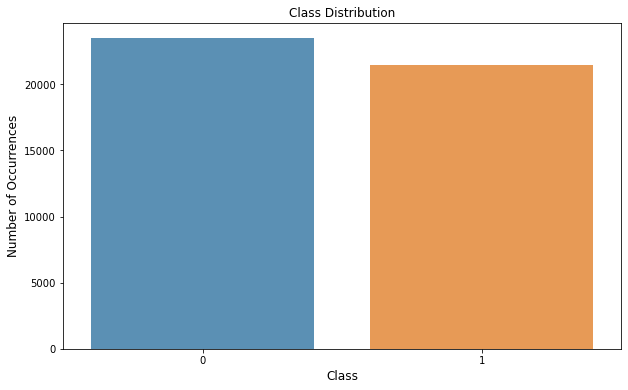

In [19]:
import seaborn as sns

# Assuming 'news_df' is your DataFrame and 'class' is your target column
class_count = news_df['class'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(class_count.index, class_count.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()


### Training history

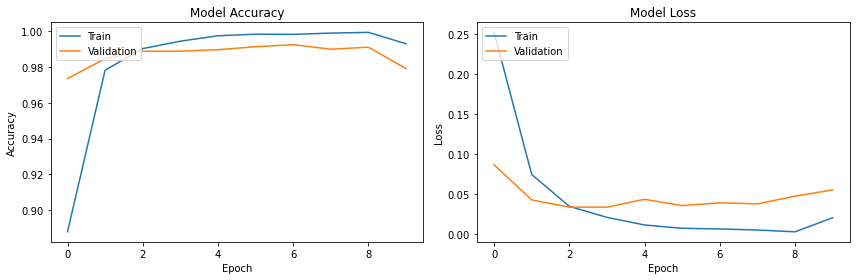

In [21]:
# Assuming 'history' is the History object returned by model.fit()
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Confusoin Matrix

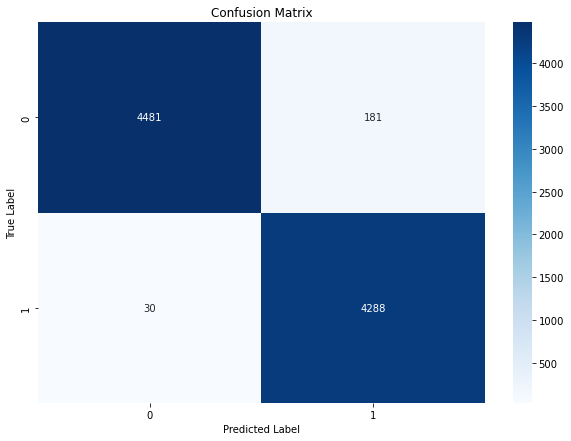

In [22]:
# Convert the one-hot encoded predictions back to class labels
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()